In [127]:
import cv2
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import copy

In [128]:
def show_img_range(np_array, max, min):
    plt.imshow(np_array, cmap='gray', vmin=max, vmax=min)
    plt.colorbar()  
    plt.show()

def show_img(np_array):
    plt.imshow(np_array, cmap='gray')
    plt.colorbar()  
    plt.show()
    

In [129]:
# 原圖
im = cv2.imread('test123.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype(np.float64)
# im_modify = cv2.convertScaleAbs(im, alpha=4, beta=0)
im_modify = im
im.shape

#取一條測試
selected_row = 400

# 提取行或列
selected_data_row = im[selected_row, :]

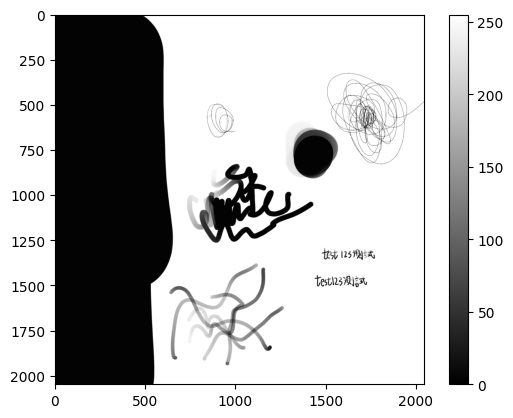

In [130]:
show_img(im)

In [131]:
# 一維DCT轉換
def dct1d(signal):
    return dct(signal, type=2, norm='ortho')

# 二維DCT轉換
def dct2d(image):
    return dct(dct(image, axis=0, type=2, norm='ortho'), axis=1, type=2, norm='ortho')



dct_results 的形狀： (361,)


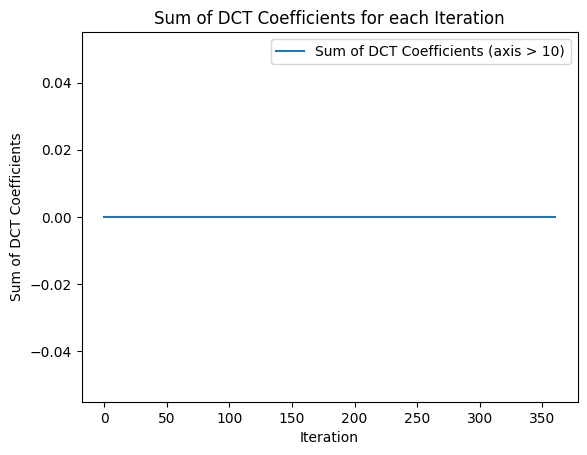

In [132]:
A = 400
data = selected_data_row
# 挑選七個點的窗口大小
window_size = 40

# 創建一個空的列表，用於存儲每次 DCT 的結果
dct_results = []

# 進行循環，每次挑選七個點進行 DCT 轉換
for i in range(A - window_size + 1):
    selected_data = data[i:i + window_size]
    dct_transformed = dct(selected_data, type=2, norm='ortho')
    
    # 將座標軸大於4的 DCT 系數相加
    sum_greater_than_4 = np.max(np.abs(dct_transformed[30:]))
    
    # 將結果添加到列表中
    dct_results.append(sum_greater_than_4)

# 將列表轉換為 NumPy array
dct_results = np.array(dct_results)

# 顯示 dct_results 的形狀
print("dct_results 的形狀：", dct_results.shape)

# 繪製 DCT 系數相加的結果
plt.plot(dct_results, label='Sum of DCT Coefficients (axis > 10)')
plt.title('Sum of DCT Coefficients for each Iteration')
plt.xlabel('Iteration')
plt.ylabel('Sum of DCT Coefficients')
plt.legend()
plt.show()





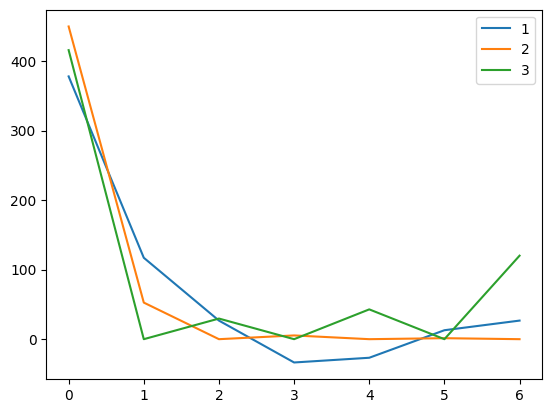

In [133]:
# 進行一維DCT轉換
dct_signal1=np.array([200,200,200,100,100,100,100])
dct_signal2=np.array([200,190,180,170,160,150,140])
dct_signal3=np.array([200,100,200,100,200,100,200])

plt.plot(dct1d(dct_signal1),label='1')
plt.plot(dct1d(dct_signal2),label='2')
plt.plot(dct1d(dct_signal3),label='3')

plt.legend()
plt.show()

In [134]:
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt


# 每次DCT取的點的數量
points_to_select = 40

# 用於存儲每一行的DCT結果
all_dct_results = []

# 進行循環，對每一行取七個點進行DCT轉換，然後將結果合併
for row in im:
    row_dct_results = []
    for i in range(len(row) - points_to_select + 1):
        selected_points = row[i:i + points_to_select]
        dct_transformed = dct(selected_points, type=2, norm='ortho')
        row_dct_results.append(np.max(np.abs(dct_transformed[32:])))
    all_dct_results.append(row_dct_results)

# 將結果轉換為NumPy array
all_dct_results = np.array(all_dct_results)



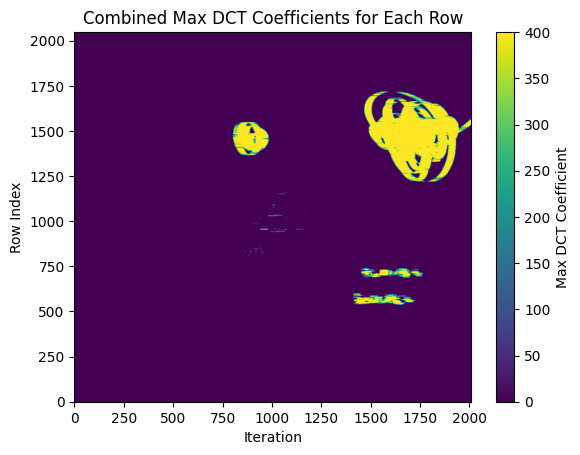

In [144]:
threshold_value = 20  # 你可以根據實際需求調整這個數值
all_dct_results_th = deep_copy_array = copy.deepcopy(all_dct_results)
all_dct_results_th[all_dct_results_th > threshold_value] = 400
all_dct_results_th[all_dct_results_th < threshold_value] = 0



# 顯示合併後的DCT結果
plt.imshow(all_dct_results_th, cmap='viridis', aspect='auto', extent=[0, len(row_dct_results), 0, len(im)])
plt.colorbar(label='Max DCT Coefficient')
plt.title('Combined Max DCT Coefficients for Each Row')
plt.xlabel('Iteration')
plt.ylabel('Row Index')
plt.show()

